# **Day 2 Week 2**
### Correlation and regression analysis

### Task-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Part-2

### App Category

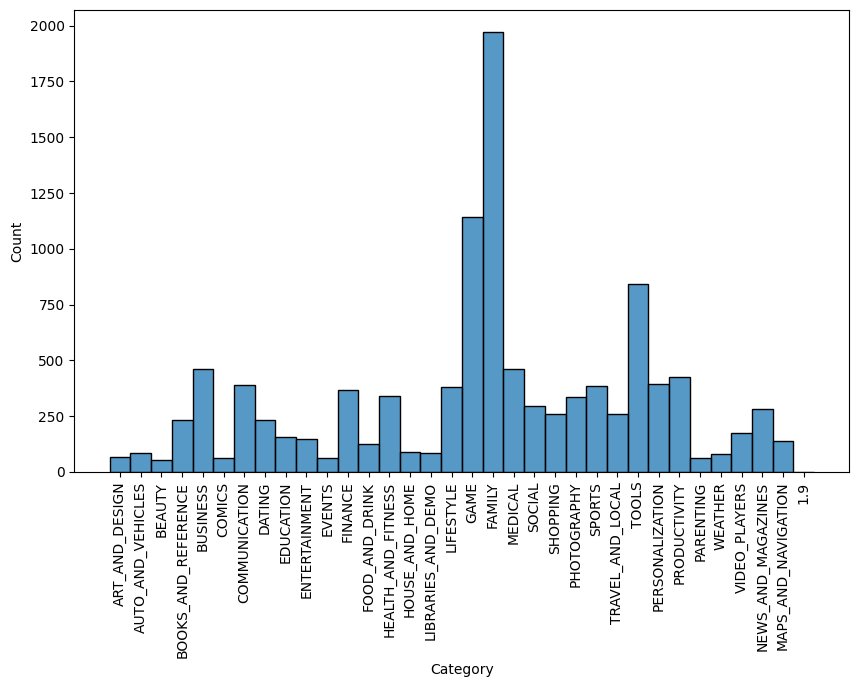

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Category)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.Category.describe()

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

### Ratings

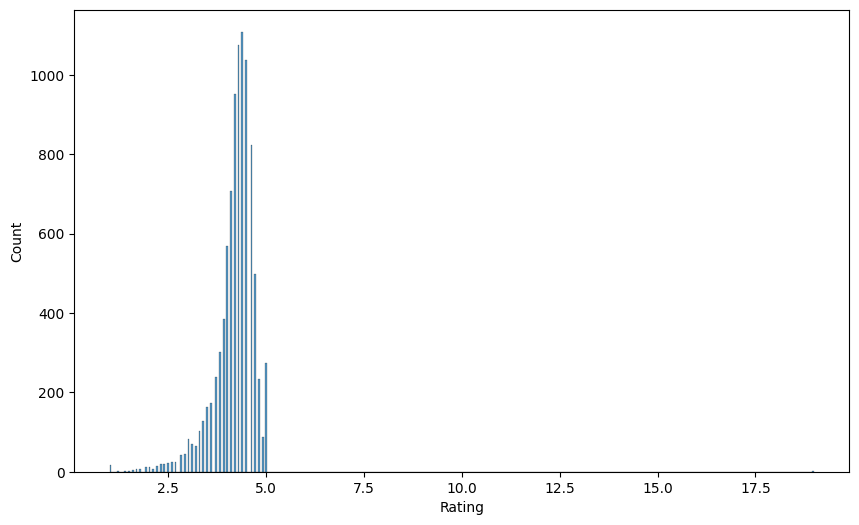

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df.Rating)
plt.show()

In [ ]:
df.Rating.describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
print('Median:',np.median(df.Rating))

Median: nan





### Reviews



In [ ]:
df.Reviews.describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

### Part-3

In [ ]:
temp = df['Installs'].str.replace('+', '')
temp = temp.loc[temp != 'Free']
temp = temp.str.replace(',', '').astype(int)

<ipython-input-285-ffdb4c09fc1b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp = df['Installs'].str.replace('+', '')


In [ ]:
print("Correlation between the number of installs and app ratings:", round(temp.corr(df['Rating']),4))

Correlation between the number of installs and app ratings: 0.0514


In [ ]:
temp = df['Size'].str.replace('M', '')
temp = temp[temp.str.contains('k')].str.replace('k', '').astype('float') / 1024
temp = temp.replace('Varies with device', temp[temp != 'Varies with device'].mode().iloc[0])
temp = temp.astype('float')
df['Size']=temp
temp2 = df['Reviews'].str.replace('M', '000000')
temp2 = temp2.str.replace('.','')
temp2 = temp2.str.replace('k','')
temp2 = temp2.str.replace('+','')
temp2 = temp2.str.replace(',','')
temp2=temp2.astype('float')

<ipython-input-284-a90d72441789>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp2 = temp2.str.replace('.','')
<ipython-input-284-a90d72441789>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp2 = temp2.str.replace('+','')


In [ ]:
print("Correlation between the app size and reviews:", round(temp.corr(temp2),4))

Correlation between the app size and reviews: -0.0105


### Part-4

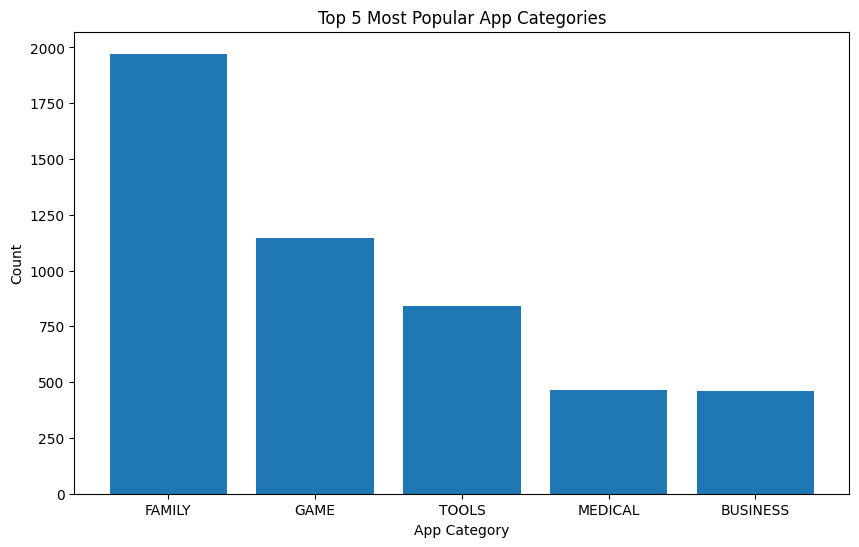

In [ ]:
category_counts = df['Category'].value_counts()
top_categories = category_counts.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories.values)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Top 5 Most Popular App Categories')
plt.show()

### Part-5

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
#temp2 is the processed Reviews so we will use it here
df.Reviews=temp2
df.Reviews

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

In [ ]:
print('Outliers in Reviews:', find_outliers_IQR(df.Reviews).count())

Outliers in Reviews: 1925


In [ ]:
print('Outliers in Ratings:', find_outliers_IQR(df.Rating).count())

Outliers in Ratings: 504


### Part-6

In [ ]:
df = df.drop_duplicates()
df.info()
for col in df.columns:
  print("Number of Nulls in",col,":",df[col].isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
Number of Nulls in App : 0
Number of Nulls in Category : 0
Number of Nulls in Rating : 1465
Number of Nulls in Reviews : 0
Number of Nulls in Size : 0
Number of Nu

In [ ]:
df.Rating = df.Rating.fillna(df.Rating.median())

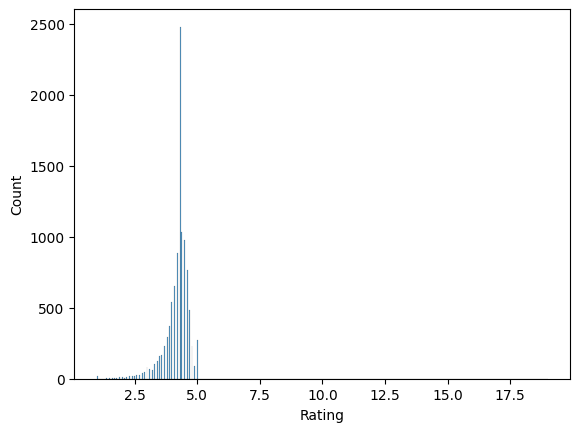

In [ ]:
sns.histplot(df.Rating)
plt.show()

In [ ]:
df.Size = df.Size.fillna(df.Size.median())

In [ ]:
for col in df.columns:
  if df[col].isna().sum() > 0 & df[col].isna().sum() < 100:
    df[col] = df[col].dropna()

### Part-7

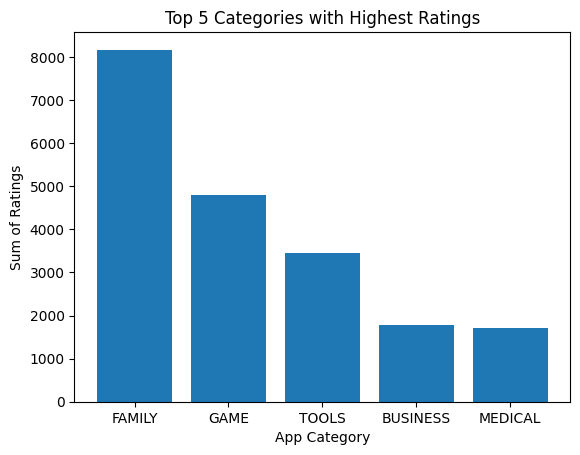

In [ ]:
temp = df.groupby('Category')['Rating'].sum()
temp = temp.sort_values(ascending=False)
temp = temp.head(5)

plt.bar(temp.index, temp.values)
plt.xlabel('App Category')
plt.ylabel('Sum of Ratings')
plt.title('Top 5 Categories with Highest Ratings')
plt.show()

In [ ]:
df['Installs']=df.Installs.str.replace('+','')
df['Installs']=df.Installs.str.replace(',','')
df['Installs']=df.Installs.str.replace('Free','')
df = df[df['Installs'] != '']
df.Installs=df.Installs.astype('int')
df.Installs.unique()

<ipython-input-289-5bd328b55cbe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df.Installs.str.replace('+','')
<ipython-input-289-5bd328b55cbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Installs=df.Installs.astype('int')


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [ ]:
df['Price']=df['Price'].str.replace('$','')
df['Price']=df['Price'].astype('float')
df.Price.unique()

<ipython-input-290-f2e721ce296a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','')


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
for col in df.columns:
  if df[col].dtype=='int64' or df[col].dtype=='float64':
    df[[col]] = scaler.fit_transform(df[[col]])

<ipython-input-292-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


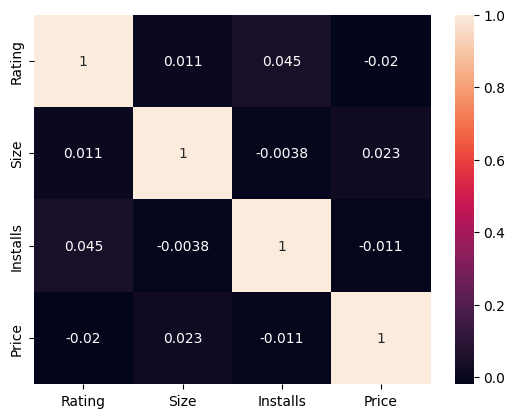

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

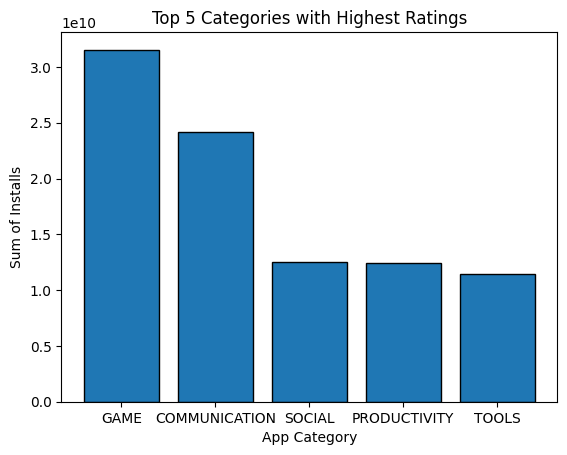

In [ ]:
temp = df.groupby('Category')['Installs'].sum()
temp = temp.sort_values(ascending=False)
temp = temp.head(5)

plt.bar(temp.index, temp.values,ec='black')
plt.xlabel('App Category')
plt.ylabel('Sum of Installs')
plt.title('Top 5 Categories with Highest Ratings')
plt.show()

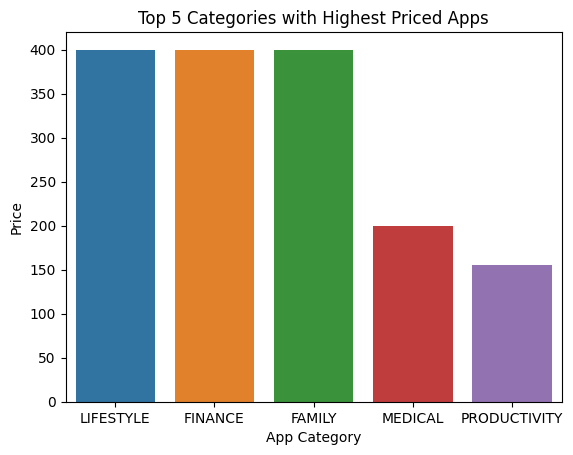

In [ ]:
temp = df.groupby('Category')['Price'].max()
temp = temp.sort_values(ascending=False)
temp = temp.head(5)

sns.barplot(x=temp.index, y=temp.values)
plt.xlabel('App Category')
plt.ylabel('Price')
plt.title('Top 5 Categories with Highest Priced Apps')
plt.show()

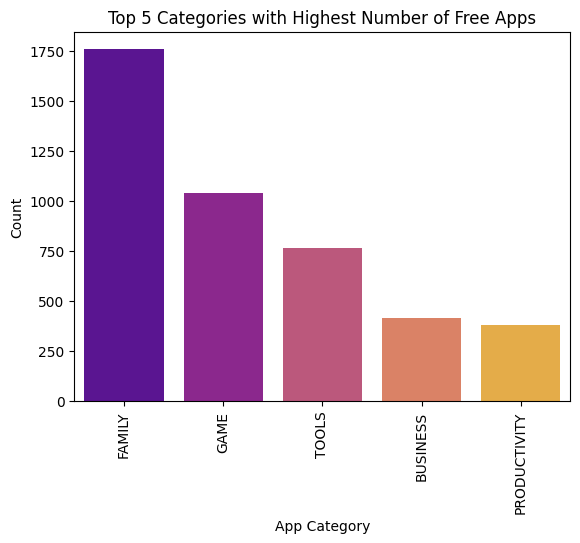

In [ ]:
temp = df[df['Price'] == 0].groupby('Category').size()
temp = temp.sort_values(ascending=False)
temp = temp.head(5)

sns.barplot(x=temp.index, y=temp.values, palette='plasma')
plt.xlabel('App Category')
plt.ylabel('Count')
plt.title('Top 5 Categories with Highest Number of Free Apps')
plt.xticks(rotation=90)
plt.show()

### Task-2

In [ ]:
data = pd.read_table("urdu-sentiment-corpus-v1.tsv")

In [ ]:
data.describe()

,Tweet,Class
count,1000,999
unique,999,3
top,اللہ جانے وے ماہی تیرا پیار کی اے دل دی اوداسی...,N
freq,2,499


In [ ]:
import keras
!pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Bidirectional, Dense, Dropout
from sklearn.preprocessing import LabelEncoder


# Step 1: Preprocess the text data
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['Tweet'])

X = tokenizer.texts_to_sequences(data['Tweet'])
X = pad_sequences(X, maxlen=max_sequence_length)
y = np.array(data['Class'])

# Use LabelEncoder to convert class labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Define and train the RNN models

# Hyperparameters to try
num_layers_list = [2, 3]
dropout_rate_list = [0.3, 0.7]

results_table = []

for num_layers in num_layers_list:
    for dropout_rate in dropout_rate_list:
        # RNN model
        model_rnn = Sequential()
        model_rnn.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length))
        for _ in range(num_layers):
            model_rnn.add(LSTM(64, dropout=dropout_rate, recurrent_dropout=dropout_rate, return_sequences=True))
        model_rnn.add(LSTM(64, dropout=dropout_rate, recurrent_dropout=dropout_rate))
        model_rnn.add(Dense(1, activation='sigmoid'))
        model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model_rnn.fit(X_train, y_train, epochs=5, batch_size=64)

        # Evaluate the model
        y_pred_prob_rnn = model_rnn.predict(X_test)
        y_pred_rnn = (y_pred_prob_rnn > 0.5).astype(int)  # Convert probabilities to binary predictions
        accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
        precision_rnn = precision_score(y_test, y_pred_rnn, average='macro')  # Use 'macro' averaging for precision
        recall_rnn = recall_score(y_test, y_pred_rnn, average='macro')  # Use 'macro' averaging for recall
        f1_rnn = f1_score(y_test, y_pred_rnn, average='macro')  # Use 'macro' averaging for F1-score

        # Append the results to the table
        results_table.append({
            'Model': 'RNN',
            'Number of Layers': num_layers,
            'Dropout Rate': dropout_rate,
            'Accuracy': accuracy_rnn,
            'Precision': precision_rnn,
            'Recall': recall_rnn,
            'F-Score': f1_rnn
        })

# Step 4: Report the results in a table
results_df = pd.DataFrame(results_table)
print(results_df)

In [ ]:
print(results_df)

  Model  Number of Layers  Dropout Rate  Accuracy  Precision    Recall  \
0   RNN                 2           0.3      0.02   0.006667  0.333333   
1   RNN                 2           0.7      0.02   0.006667  0.333333   
2   RNN                 3           0.3      0.02   0.006667  0.333333   
3   RNN                 3           0.7      0.02   0.006667  0.333333   

    F-Score  
0  0.013072  
1  0.013072  
2  0.013072  
3  0.013072  
